<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/Genre_EDA_Part4_BoxPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook explores the average book lenghts etc for each genre with box plots

Gettin data in and merging it with html books content and meta data with genre names and other inofmration.

In [1]:
#Unzip the Overall data
!unzip Gutenberg_English_Fiction_1k.zip -d books_set


Archive:  Gutenberg_English_Fiction_1k.zip
   creating: books_set/Gutenberg_English_Fiction_1k/
   creating: books_set/Gutenberg_English_Fiction_1k/Gutenberg_19th_century_English_Fiction/
  inflating: books_set/Gutenberg_English_Fiction_1k/Gutenberg_19th_century_English_Fiction/pg10067-content.html  
  inflating: books_set/Gutenberg_English_Fiction_1k/Gutenberg_19th_century_English_Fiction/pg1032-content.html  
  inflating: books_set/Gutenberg_English_Fiction_1k/Gutenberg_19th_century_English_Fiction/pg10379-content.html  
  inflating: books_set/Gutenberg_English_Fiction_1k/Gutenberg_19th_century_English_Fiction/pg10473-content.html  
  inflating: books_set/Gutenberg_English_Fiction_1k/Gutenberg_19th_century_English_Fiction/pg105JaneAusPersuatn-content.html  
  inflating: books_set/Gutenberg_English_Fiction_1k/Gutenberg_19th_century_English_Fiction/pg10812-content.html  
  inflating: books_set/Gutenberg_English_Fiction_1k/Gutenberg_19th_century_English_Fiction/pg10826-content.html  
  

In [2]:
#Reading the meta data file
import pandas as pd

data = []

import os
file = os.path.abspath('books_set/Gutenberg_English_Fiction_1k/master996.csv')

with open(file, "rb") as myfile:
    # read the header seperately
    # decode it as 'utf-8', remove any special characters, and split it on the comma (or deliminator)
    header = myfile.readline().decode('utf-8').replace('\r\n', '').split(';')
    # read the rest of the data
    for line in myfile:
        row = line.decode('utf-8', errors='ignore').replace('\r\n', '').split(';')
        data.append(row)

# save the data as a dataframe
meta_data = pd.DataFrame(data=data, columns = header)
meta_data.head(5)

,Book_Name,book_id,guten_genre,Author_Name
0,The Mystery of the Boule Cabinet: A Detective ...,pg10067.epub,Detective and Mystery,Stevenson| Burton Egbert
1,The Pupil,pg1032.epub,Literary,James| Henry
2,At Love's Cost,pg10379.epub,Literary,Garvice| Charles
3,The Heart of the Range,pg10473.epub,Western Stories,White| William Patterson
4,The Worshipper of the Image,pg10812.epub,Literary,Gallienne| Richard Le


In [3]:
#Extracting the bookid into Dataframe column FileNo, book id pg10067- FileNo - 10067

meta_data['FileNo'] = meta_data['book_id'].str.replace(r'\D+', '').astype(int)

#Checkign the values

meta_data.sort_values(by=['FileNo'], inplace=True)
meta_data

,Book_Name,book_id,guten_genre,Author_Name,FileNo
961,Alice's Adventures in Wonderland,pg11CarolAlice.epub,Literary,Carroll| Lewis,11
962,Through the Looking-Glass,pg12CarolGlassLook.epub,Literary,Carroll| Lewis,12
995,A Tale of Two Cities,pg98DickensTaleCities.epub,Literary,Dickens| Charles,98
958,Persuasion,pg105JaneAusPersuatn.epub,Literary,Austen| Jane,105
959,Return of Sherlock Holmes,pg108DoyleReturnSherlk.epub,Detective and Mystery,Connan| Doyle,108
...,...,...,...,...,...
863,Kate Vernon: A Tale. Vol. 2 (of 3),pg53356.epub,Literary,Alexander| Mrs.,53356
864,The Touch of Abner,pg53604.epub,Literary,Cody| H. A.,53604
865,Kate Vernon: A Tale. Vol. 3 (of 3),pg53668.epub,Literary,Alexander| Mrs.,53668
964,Mardi: and A Voyage Thither I,pg13720HermanVoyage1.epub,Sea and Adventure,Melville| Herman,137201


In [0]:
import glob

# Getting all files and its names into dict and then converting to dataframe"""

Content = {}

#Its placed in Books folder at local , need to change it later 
%timeit

files = glob.glob("books_set//Gutenberg_English_Fiction_1k//Gutenberg_19th_century_English_Fiction//*.html")
for f in files:
    with open(f,mode ='r', encoding = 'utf8') as myfile:
        Content[f]=myfile.read().replace("<br>", '\n')


In [5]:
#Putting it in dataframe
df = pd.DataFrame.from_dict(Content,orient='index').reset_index()

#Renaming column names
df.columns = ['File_Name', 'Data']
print(df.head(5))
print(df['File_Name'][0])
df['File_Name'] = df['File_Name'].str.replace("books_set//Gutenberg_English_Fiction_1k//Gutenberg_19th_century_English_Fiction/", "l")
print(df['File_Name'][0])
#Adding FilNo column to join
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)
left = df
right = meta_data
result = pd.merge(left, right , how='inner', on=['FileNo', 'FileNo'])

#Checking resulting dataframe
result.info()

#Dropping unnecessery columns

books=result.drop(['File_Name', 'book_id'], axis=1)
books.head(5)

                                           File_Name                                               Data
0  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>In the Morning of Life the Truthful wooed t...
1  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>Page 116\n<p>"Harold Manning: wilt thou hav...
2  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>"Agua! por amor Dios, agua - aguita!" Water...
3  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>"Mrs. Jackson!"\n<p>Mrs. Jackson was feedin...
4  books_set//Gutenberg_English_Fiction_1k//Guten...  <p>Notwithstanding the baronet's polite invita...
books_set//Gutenberg_English_Fiction_1k//Gutenberg_19th_century_English_Fiction/pg2675-content.html
lpg2675-content.html
<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   File_Name    996 non-null    object
 1   Data         996 non-nu

,Data,FileNo,Book_Name,guten_genre,Author_Name
0,<p>In the Morning of Life the Truthful wooed t...,2675,Burlesques,Literary,Lynch| Lawrence L.
1,"<p>Page 116\n<p>""Harold Manning: wilt thou hav...",35203,In the Van- The Builders,Literary,Price-Brown| John
2,"<p>""Agua! por amor Dios, agua - aguita!"" Water...",35214,The Guerilla Chief- and Other Tales,Literary,Reid| Mayne
3,"<p>Seven o'clock in the morning, and chee-op -...",36723,One Maid's Mischief,Literary,Fenn| George Manville
4,"<p>LONDON: WARD, LOCK & Co., Limited, WARWICK ...",35304,The Last Stroke: A Detective Story,Detective and Mystery,Lynch| Lawrence L.


In [6]:
from collections import Counter
print('Dataset shape %s' % Counter(books['guten_genre']))

Dataset shape Counter({'Literary': 794, 'Detective and Mystery': 111, 'Sea and Adventure': 36, 'Love and Romance': 18, 'Western Stories': 18, 'Humorous and Wit and Satire': 6, 'Ghost and Horror': 6, 'Christmas Stories': 5, 'Allegories': 2})


In [7]:
from bs4 import BeautifulSoup
books['Data']= [BeautifulSoup(text).get_text() for text in books['Data'] ]
books.head()

,Data,FileNo,Book_Name,guten_genre,Author_Name
0,In the Morning of Life the Truthful wooed the ...,2675,Burlesques,Literary,Lynch| Lawrence L.
1,"Page 116\n""Harold Manning: wilt thou have this...",35203,In the Van- The Builders,Literary,Price-Brown| John
2,"""Agua! por amor Dios, agua - aguita!"" Water! f...",35214,The Guerilla Chief- and Other Tales,Literary,Reid| Mayne
3,"Seven o'clock in the morning, and chee-op - ch...",36723,One Maid's Mischief,Literary,Fenn| George Manville
4,"LONDON: WARD, LOCK & Co., Limited, WARWICK HOU...",35304,The Last Stroke: A Detective Story,Detective and Mystery,Lynch| Lawrence L.


In [0]:
books.rename(columns = {'Data': 'data', 'guten_genre': 'genre'} , inplace = True)

In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data         996 non-null    object
 1   FileNo       996 non-null    int64 
 2   Book_Name    996 non-null    object
 3   genre        996 non-null    object
 4   Author_Name  996 non-null    object
dtypes: int64(1), object(4)
memory usage: 46.7+ KB


Starting with tokenisation using nltk

In [10]:
#Importing NLTK libariaries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Functions for tokens at sentence, word and charc level

In [0]:

from nltk import sent_tokenize, word_tokenize
def token_sentence(text):
    sentences = nltk.Text(sent_tokenize(text)) #sentence token
    return len(sentences) # returns total number of sentences after tokeinsing on passes text

In [0]:
def token_word(text):
    words = nltk.Text(word_tokenize(((text)))) #word token
    return len(words) #returns total number of words after tokeinsing on passed text

In [0]:
def cal_len(text):
    #gives lenght of string passes
    return len(text)

In [0]:

#takes alot of time
# total lenght of each book
books['book_lenght'] = books['data'].apply(len)

#total lenght of all the books
total_lenght = books['book_lenght'].sum() #stored in a variable

#total sentences in each of the book
books['book_sen'] =  books['data'].apply(token_sentence)

#total sentence lenght in all the books
total_sen = books['book_sen'].sum() #stored in a variable

#total words in each of the book
books['book_word'] =  books['data'].apply(token_word)

#total words in all the books
total_words = books['book_word'].sum() #stored in a variable

In [0]:
# Average Book lenght
def lenght_book(text): 
    return len(text)/total_lenght

In [0]:
#Average number of sentences in a book
def number_sen(text):
    return token_sentence(text)/total_sen

In [0]:
#Average number of words in a book
def number_word(text):
    return token_word(text)/total_words

In [0]:
# Total words
def tot_word(text):
  words = nltk.Text(word_tokenize(((text))))
  return len(words)

In [0]:
list_of_stats = [
    lenght_book 
    ,number_sen 
    ,number_word 
    ]

for i in list_of_stats:
        books[i.__name__] = books.data.apply(i)

In [20]:
books.head(5)

,data,FileNo,Book_Name,genre,Author_Name,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word
0,In the Morning of Life the Truthful wooed the ...,2675,Burlesques,Literary,Lynch| Lawrence L.,845079,7122,180835,0.001990,0.001504,0.001934
1,"Page 116\n""Harold Manning: wilt thou have this...",35203,In the Van- The Builders,Literary,Price-Brown| John,419411,5377,94266,0.000988,0.001135,0.001008
2,"""Agua! por amor Dios, agua - aguita!"" Water! f...",35214,The Guerilla Chief- and Other Tales,Literary,Reid| Mayne,489886,4855,104848,0.001154,0.001025,0.001121
3,"Seven o'clock in the morning, and chee-op - ch...",36723,One Maid's Mischief,Literary,Fenn| George Manville,1002298,11160,230780,0.002360,0.002356,0.002468
4,"LONDON: WARD, LOCK & Co., Limited, WARWICK HOU...",35304,The Last Stroke: A Detective Story,Detective and Mystery,Lynch| Lawrence L.,361533,4026,82392,0.000851,0.000850,0.000881


# Box plot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


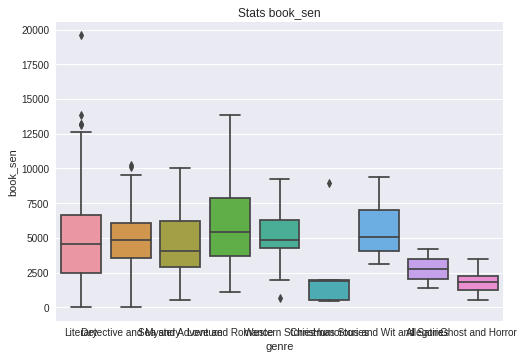

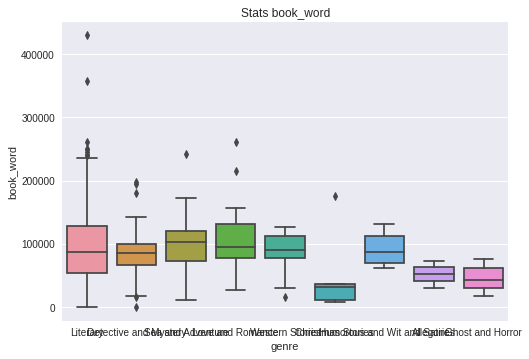

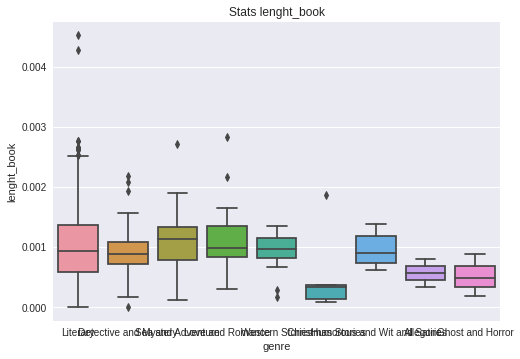

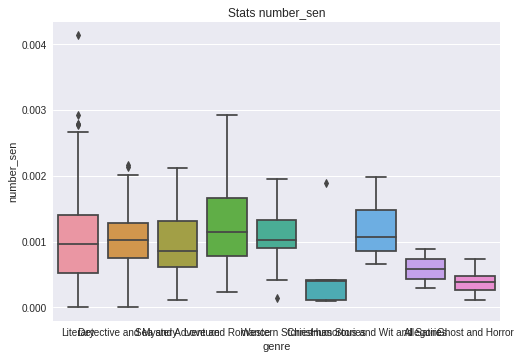

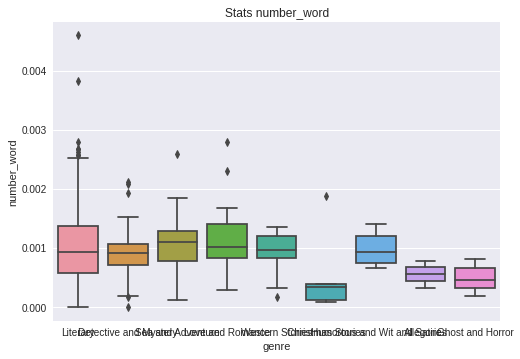

In [21]:
# ploting the features
import matplotlib.pyplot as plt
import seaborn as sns

for cols in books.columns[6:]:
    plt.style.use('seaborn')
    sns.boxplot(x='genre', y=cols, data=books)
    plt.title('Stats {}'.format(cols))
    plt.savefig('Stats {}'.format(cols))
    plt.show()